In [12]:
import numpy as np
import rasterio 
from pathlib import Path
from rasterio.plot import show
from scipy.misc import bytescale
from numpy import inf

%matplotlib inline

In [4]:
!jt -t solarizedd

In [6]:
#inputs

intiff = Path(r"D:\jlogan\2018-676-FA\wildlands_dl\wildlands\ortho\2018-10-23-Wildlands_ortho.tif")
outdir = Path(r"D:\jlogan\2018-676-FA\tmp_veg_indices")

outdir.mkdir(parents=True, exist_ok=True)

In [7]:
#load raster
dataset = rasterio.open(intiff)
aff = dataset.transform

#img = dataset.read()
r = dataset.read(1)
g = dataset.read(2)
b = dataset.read(3)

In [26]:
#calc VARI
#https://agribotix.com/blog/2017/04/30/comparing-rgb-based-vegetation-indices-with-ndvi-for-agricultural-drone-imagery/
vari = (g-r)/g+r-b


C:\Users\labuser\AppData\Local\conda\conda\envs\py_3.6_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\labuser\AppData\Local\conda\conda\envs\py_3.6_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


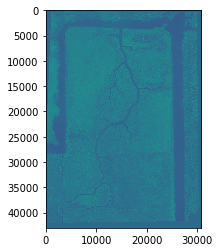

In [12]:
show(vari)

In [10]:
#calc TGI
#https://agribotix.com/blog/2017/04/30/comparing-rgb-based-vegetation-indices-with-ndvi-for-agricultural-drone-imagery/
tgi = g - 0.39 * r - 0.61 * b

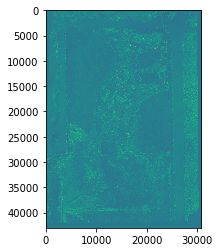

In [14]:
show(tgi)

In [41]:
#set vari infs to 0
vari_masked = np.ma.masked_invalid(vari)
tgi_masked = np.ma.masked_invalid(tgi)
#vari[vari == inf] = 0

In [29]:
np.nanmax(vari_masked)

257.0

In [42]:
#scale to 0-255

vari_scaled = bytescale(vari_masked)
tgi_scaled = bytescale(tgi_masked)

C:\Users\labuser\AppData\Local\conda\conda\envs\py_3.6_env\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `bytescale` is deprecated!
`bytescale` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
  after removing the cwd from sys.path.


In [43]:
for a in [tgi_scaled]:
    print(np.nanmin(a))
    print(np.nanmax(a))
    #print(np.nanstd(a))

0
255
114.37423135752265


In [46]:
print(f'vari_scaled {type(vari_scaled[0,0])}')
print(f'tgi_scaled {type(vari_scaled[0,0])}')

vari_scaled <class 'numpy.uint8'>
tgi_scaled <class 'numpy.uint8'>


In [49]:
#read metadata from input image
meta = dataset.meta

#update to single band, integer
meta.update(dtype=rasterio.uint8, count=1, compress='lzw')
print(meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 30720, 'height': 43008, 'count': 1, 'crs': CRS.from_dict(init='epsg:26910'), 'transform': Affine(0.03200000000003911, 0.0, 615651.0,
       0.0, -0.032000000000152795, 4244032.0), 'compress': 'lzw'}


In [50]:
#write outputs
with rasterio.open(outdir.joinpath('vari_scaled_int.tif'), 'w', **meta) as dst:
    dst.write(vari_scaled, 1)
    
with rasterio.open(outdir.joinpath('tgi_scaled.tif'), 'w', **meta) as dst:
    dst.write(tgi_scaled, 1)


In [53]:
meta2 = meta
meta2.update(dtype=rasterio.float64, count=1, compress='lzw')
with rasterio.open(outdir.joinpath('tgi.tif'), 'w', **meta) as dst:
    dst.write(tgi, 1)